# Importing libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
# Reading Data 
Data = pd.read_csv('SampleSuperstore.csv')
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Get some information 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
Data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# so we have clean data!

In [7]:
Data.shape

(9994, 13)

In [9]:
Data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
Data.duplicated().sum()


17

In [11]:
Data.drop_duplicates(keep="first" , inplace=True)


In [12]:
Data.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [13]:
Data.duplicated().sum()


0

In [16]:
insight1= Data['Profit'].min()
insight1=Data[Data['Profit']==insight1]
insight1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


In [17]:
insight2= Data['Profit'].max()
insight2=Data[Data['Profit']==insight2]
insight2

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [21]:
Data[Data['Profit']==Data['Profit'].min()]


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


# Data visualization

C:\Users\POP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


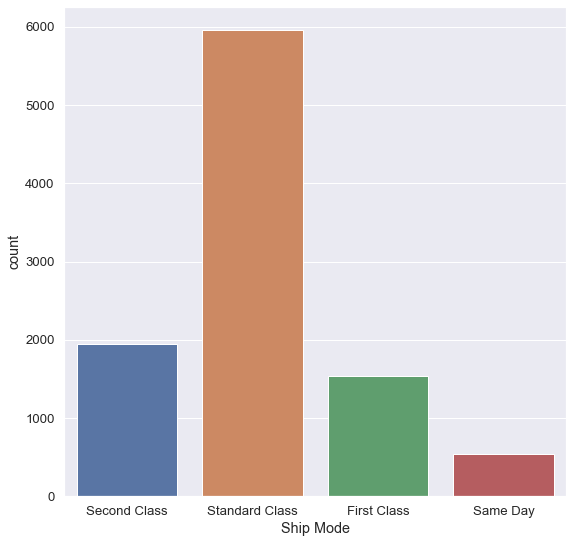

In [23]:
sns.countplot(Data['Ship Mode'])
plt.show()

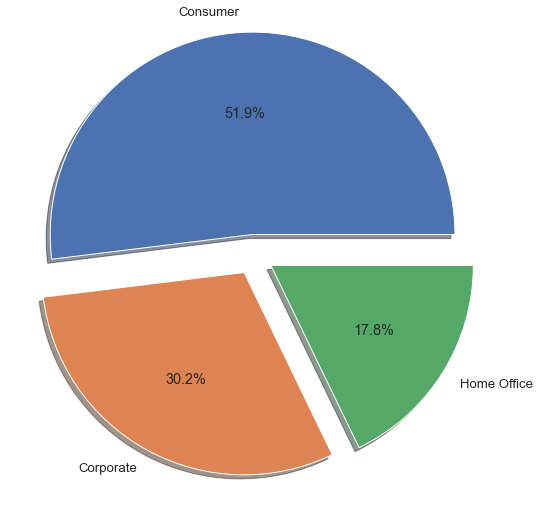

In [25]:
count=Data['Segment'].value_counts()
plt.pie(Seg_count,labels=Seg_count.index, explode = [0.1,0.1,0.1], autopct ='%1.1f%%' ,shadow = True)
plt.axis('equal')
plt.show()

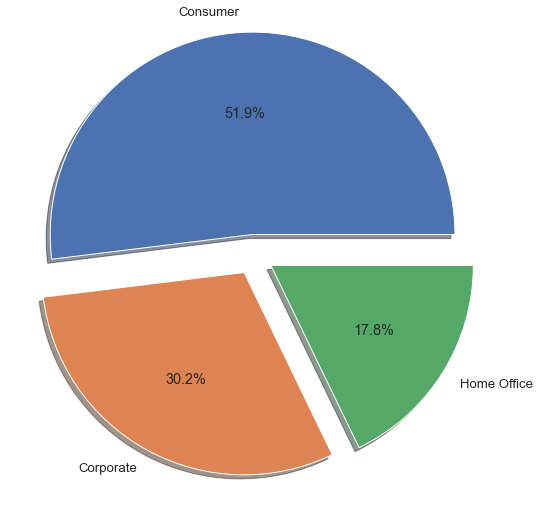

In [26]:
count=Data['Category'].value_counts()
plt.pie(Seg_count,labels=Seg_count.index, explode = [0.1,0.1,0.1], autopct ='%1.1f%%' ,shadow = True)
plt.axis('equal')
plt.show()

In [28]:
most_sales_profit=Data.groupby('State')['Sales','Profit'].sum().sort_values(by='Sales',ascending=False)
most_sales_profit

<ipython-input-28-9c69b4010b9e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_sales_profit=Data.groupby('State')['Sales','Profit'].sum().sort_values(by='Sales',ascending=False)


,Sales,Profit
State,,
California,457576.2715,76330.7891
New York,310827.1510,74015.4622
Texas,170124.5418,-25750.9833
Washington,138560.8100,33368.2375
Pennsylvania,116496.3620,-15565.4035
Florida,89473.7080,-3399.3017
Illinois,80162.5370,-12601.6500
Ohio,77976.7640,-16959.3178
Michigan,75879.6440,24428.0903


In [29]:
most_discount_profit=Data.groupby('State')['Discount','Profit'].sum().sort_values(by='Discount',ascending=False)
most_discount_profit

<ipython-input-29-fdb7ad9305fd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_discount_profit=Data.groupby('State')['Discount','Profit'].sum().sort_values(by='Discount',ascending=False)


,Discount,Profit
State,,
Texas,364.24,-25750.9833
Pennsylvania,192.70,-15565.4035
Illinois,191.10,-12601.6500
Ohio,152.10,-16959.3178
California,145.60,76330.7891
Florida,114.65,-3399.3017
North Carolina,70.60,-7490.9122
Arizona,68.00,-3427.9246
New York,62.40,74015.4622
